# 3

In [52]:
import numpy as np
import math
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
#读取文件-感谢李娟同学提供的数据
ds = xr.open_dataset("slp.mon.mean.nc")

# Check the data

ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 886)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-10-01
Data variables:
    slp      (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:35 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean slp from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

(array([2.900000e+01, 1.638000e+03, 3.055600e+04, 2.989340e+05,
        2.572520e+06, 5.772375e+06, 5.582180e+05, 7.139400e+04,
        7.525000e+03, 4.430000e+02]),
 array([-34.748657 , -28.002247 , -21.255835 , -14.509424 ,  -7.763013 ,
         -1.0166016,   5.7298098,  12.476221 ,  19.222631 ,  25.969044 ,
         32.715454 ], dtype=float32),
 <BarContainer object of 10 artists>)

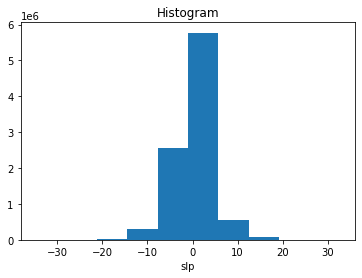

In [45]:
#3.1 
# 消除周期季节性循环

group_data = ds.slp.groupby('time.month')

#对分组数据应用均值，然后计算异常值  
slp_anom = group_data - group_data.mean(dim='time')
slp_anom

#绘制异常值分布
slp_anom.isel(time=slice(0,886)).plot()

# 3.2

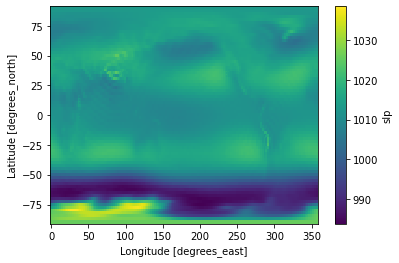

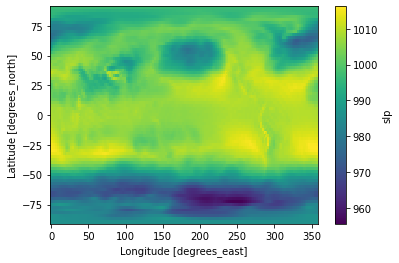

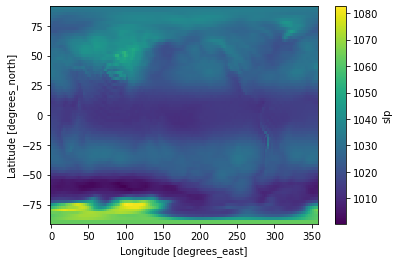

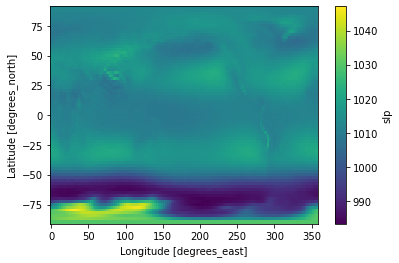

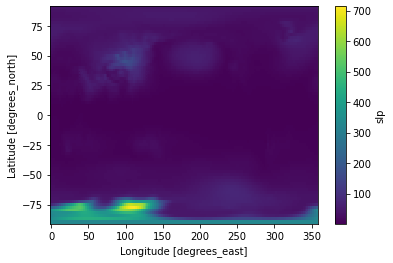

In [51]:
#slp数据时间平均2-D图
ds.slp.mean(dim="time").plot()
plt.show()

#slp数据时间序列上最小值2-D图
ds.slp.min(dim="time").plot()
plt.show()

#slp数据时间序列上最大值2-D图
ds.slp.max(dim="time").plot()
plt.show()

#slp数据时间序列上中位数2-D图
ds.slp.median(dim="time").plot()
plt.show()

#slp数据时间序列上方差2-D图
ds.slp.var(dim="time").plot()
plt.show()